In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae 
from scipy import stats
import seaborn as sns

In [2]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_Field_DataMerged = cwd_Field + '\\Field Dataset Merged'
cwd_Field_DataMerged_CSV_Indices = cwd_Field_DataMerged + "\\CSV Biodiversity Indices"
cwd_PRISMA = cwd + "\\PRISMA Raster Raw\\Merged"
cwd_PRISMA_Result = cwd + "\\ResultsPRISMA"
cwd_Field_Data1 = cwd_Field + '\\Field Dataset 1'
cwd_Field_Data1_CSV = cwd_Field_Data1 + "\\CSV"

In [3]:
# Get the name of all the rasters in our folder
raster_Names = []
for item in [name.split('.')[0] for name in os.listdir(cwd_PRISMA)]:
    if item not in raster_Names:
        raster_Names.append(item)
raster_Names

['PRS_L2D_STD_20220611_20220710_NS_mosaic_crop_smooth_v2i',
 'PRS_L2D_STD_20220906_20220911_NS_mosaic_crop_smooth_v2i',
 'PRS_L2D_STD_20220906_20220911_NS_mosaic_crop_smooth_v2i_new']

In [4]:
df_Raster_6 = pd.read_csv(cwd_PRISMA_Result + "\\" + raster_Names[0] + "\\AlphaDiversity300m.csv", sep = '\t')
df_Raster_9 = pd.read_csv(cwd_PRISMA_Result + "\\" + raster_Names[1] + "_new\\AlphaDiversity300m.csv", sep = '\t')
df_Raster_6.head()

,Plot,Species_Richness,Fisher,Shannon,Simpson,FRic,FEve,FDiv
0,FOR01,6.85,0,1.343611,0.652301,227.408634,0.785564,0.717896
1,FOR02,3.90,0,0.841540,0.452227,113.522184,0.809797,0.702410
2,FOR03,3.85,0,0.846891,0.457066,109.446224,0.843043,0.717756
3,FOR04,7.50,0,1.732798,0.792842,272.724720,0.795643,0.636163
4,FOR05,3.30,0,0.998213,0.595429,71.804002,0.779516,0.643796


In [5]:
df_Raster_Merge = pd.merge(df_Raster_6[['Plot','Species_Richness','Shannon','Simpson']],df_Raster_9[['Plot','Species_Richness','Shannon','Simpson']], on = 'Plot', suffixes= [' June', ' Sep'])
df_Raster_Merge.head()

,Plot,Species_Richness June,Shannon June,Simpson June,Species_Richness Sep,Shannon Sep,Simpson Sep
0,FOR01,6.85,1.343611,0.652301,7.05,1.545213,0.728090
1,FOR02,3.90,0.841540,0.452227,5.05,1.303829,0.675938
2,FOR03,3.85,0.846891,0.457066,4.60,1.263848,0.675101
3,FOR04,7.50,1.732798,0.792842,3.50,0.820329,0.456959
4,FOR05,3.30,0.998213,0.595429,1.40,0.195346,0.129893


In [6]:
df_Raster_Merge.columns = ['Plot','Raster Species Richness June','Raster Shannon June','Raster Simpson June','Raster Species Richness Sep','Raster Shannon Sep','Raster Simpson Sep']
df_Raster_Merge.head()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep
0,FOR01,6.85,1.343611,0.652301,7.05,1.545213,0.728090
1,FOR02,3.90,0.841540,0.452227,5.05,1.303829,0.675938
2,FOR03,3.85,0.846891,0.457066,4.60,1.263848,0.675101
3,FOR04,7.50,1.732798,0.792842,3.50,0.820329,0.456959
4,FOR05,3.30,0.998213,0.595429,1.40,0.195346,0.129893


In [7]:
df_Association = pd.read_csv(cwd_Field_Data1_CSV + "\\FieldData1 Valid Association.csv")
df_Association.head()

,Plot,Association
0,FOR01,Oak_hornbeam_humid
1,FOR02,Prunus
2,FOR03,Prunus
3,FOR04,Oak_open_canopy
4,FOR05,Oak_open_canopy


In [8]:
df_Raster_Merge_1 = pd.merge(df_Raster_Merge.iloc[0:63,:],df_Association,on='Plot')
df_Raster_Merge_1.tail()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep,Association
58,FOR78,7.50,1.543214,0.716396,6.25,1.418073,0.680039,Prunus
59,FOR79,10.75,2.013239,0.819431,6.50,1.519643,0.730107,Mixed deciduous
60,FOR80,8.70,1.867202,0.814439,7.05,1.699316,0.784217,Mixed deciduous
61,FOR81,10.75,2.099979,0.842573,5.05,1.252428,0.659640,Mixed deciduous
62,FOR82,9.25,1.938799,0.816761,3.40,0.866053,0.494998,Mixed deciduous


## Species Richness

In [9]:
df_Field_Richness = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid SpeciesRichness.csv")
df_Field_Richness.head()

,Plot,Field Species Richness
0,FOR01,5
1,FOR02,7
2,FOR03,4
3,FOR04,2
4,FOR05,1


In [10]:
df_Field_Richness_1 = df_Field_Richness.copy().iloc[0:63,:]
df_Field_Richness_1.tail()

,Plot,Field Species Richness
58,FOR78,2
59,FOR79,4
60,FOR80,3
61,FOR81,4
62,FOR82,4


In [11]:
df_Richness_1 = pd.merge(df_Field_Richness_1,df_Raster_Merge_1[['Plot','Association','Raster Species Richness June','Raster Species Richness Sep']],on = 'Plot')
df_Richness_1.head()

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
0,FOR01,5,Oak_hornbeam_humid,6.85,7.05
1,FOR02,7,Prunus,3.90,5.05
2,FOR03,4,Prunus,3.85,4.60
3,FOR04,2,Oak_open_canopy,7.50,3.50
4,FOR05,1,Oak_open_canopy,3.30,1.40


In [12]:
df_Richness_1.describe()

,Field Species Richness,Raster Species Richness June,Raster Species Richness Sep
count,63.000000,63.000000,63.000000
mean,3.507937,8.081746,5.403968
std,1.865415,1.757617,1.921384
min,1.000000,3.300000,1.400000
25%,2.000000,7.000000,4.275000
50%,3.000000,8.300000,5.050000
75%,4.000000,9.250000,7.000000
max,8.000000,11.450000,9.050000


In [13]:
df_Richness_1_Asso = df_Richness_1.copy().sort_values('Association')
df_Richness_1_Asso

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
20,FOR21,4,Alder,8.30,4.50
19,FOR20,3,Alder,8.85,4.80
35,FOR55,2,Alder,8.35,3.10
7,FOR08,4,Alder,10.90,4.50
36,FOR56,2,Alder,7.70,2.50
...,...,...,...,...,...
24,FOR25,1,Pine,10.45,8.90
30,FOR31,2,Pine,8.20,7.20
58,FOR78,2,Prunus,7.50,6.25
2,FOR03,4,Prunus,3.85,4.60


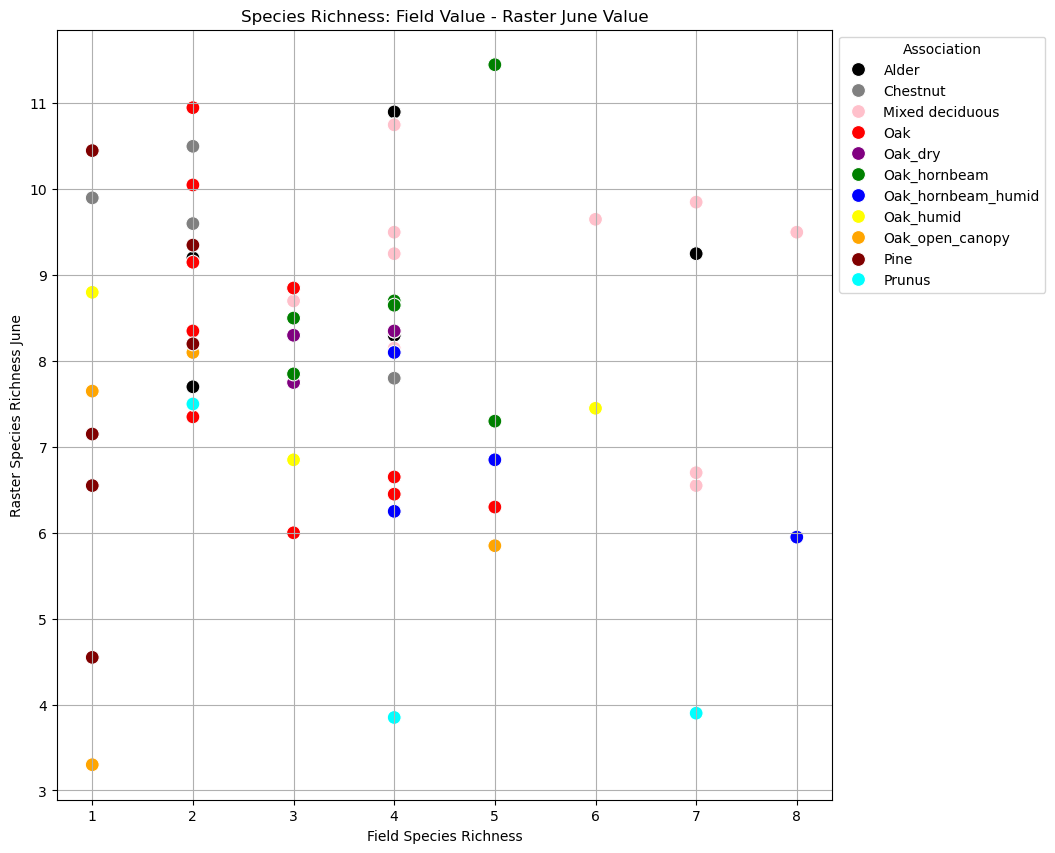

In [14]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness June', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster June Value')
plt.show()

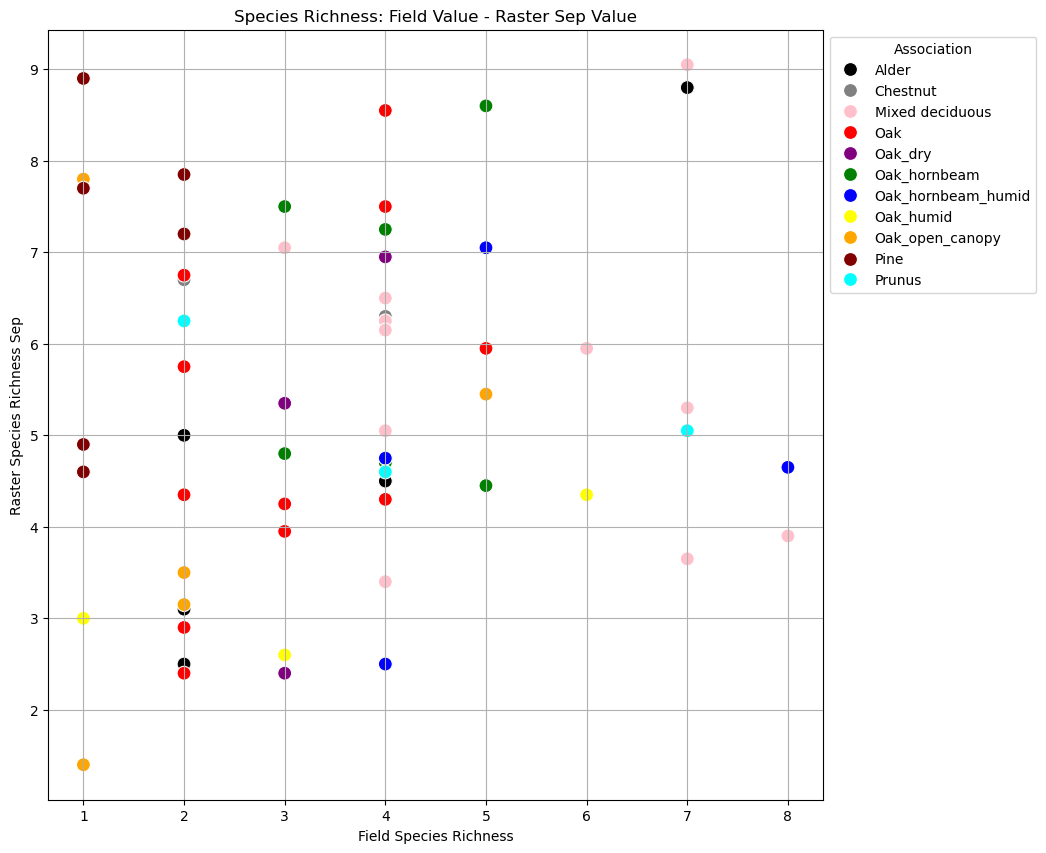

In [15]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness Sep', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster Sep Value')
plt.show()

In [16]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic)  + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-14.164425473077744
1.1033511691572216e-27
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to -0.08542895596869755-0.08542895596869755; the p value is 0.5055954837370703
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [17]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

-7.157519680694527

In [18]:
mae(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

4.765873015873015

In [19]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic)  + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-5.6196737427993595
1.199161629951715e-07
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.071429555195250490.07142955519525049; the p value is 0.577997122983795
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [20]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

-1.9635191656856987

In [21]:
mae(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

2.524603174603176

## Shannon

In [22]:
df_Field_Shannon = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Shannon.csv")
df_Field_Shannon.head()

,Plot,Field Shannon
0,FOR01,1.267990
1,FOR02,1.604816
2,FOR03,0.534923
3,FOR04,0.474139
4,FOR05,0.000000


In [23]:
df_Field_Shannon_1 = df_Field_Shannon.copy().iloc[0:63,:]

In [24]:
df_Shannon_1 = pd.merge(df_Field_Shannon_1,df_Raster_Merge_1[['Plot','Association','Raster Shannon June','Raster Shannon Sep']],on = 'Plot')
df_Shannon_1.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
58,FOR78,0.286836,Prunus,1.543214,1.418073
59,FOR79,1.344339,Mixed deciduous,2.013239,1.519643
60,FOR80,0.918320,Mixed deciduous,1.867202,1.699316
61,FOR81,1.301362,Mixed deciduous,2.099979,1.252428
62,FOR82,1.193337,Mixed deciduous,1.938799,0.866053


In [25]:
df_Shannon_1_Asso = df_Shannon_1.copy().sort_values('Association')
df_Shannon_1_Asso.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
24,FOR25,0.000000,Pine,2.023221,1.788818
30,FOR31,0.146145,Pine,1.511437,1.344880
58,FOR78,0.286836,Prunus,1.543214,1.418073
2,FOR03,0.534923,Prunus,0.846891,1.263848
1,FOR02,1.604816,Prunus,0.841540,1.303829


In [35]:
df_Shannon_1_Asso.describe()

,Field Shannon,Raster Shannon June,Raster Shannon Sep
count,63.000000,63.000000,63.000000
mean,0.793971,1.677465,1.218721
std,0.519653,0.311916,0.382238
min,0.000000,0.841540,0.195346
25%,0.401475,1.500057,1.006815
50%,0.804448,1.710868,1.252428
75%,1.180566,1.879909,1.517841
max,1.794190,2.230765,1.953867


In [26]:
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso.copy()
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso_NoZero.loc[df_Shannon_1_Asso_NoZero['Field Shannon']!=0]
df_Shannon_1_Asso_NoZero.head()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
20,FOR21,0.942002,Alder,1.673444,1.135510
19,FOR20,0.886464,Alder,1.795596,1.221373
35,FOR55,0.276191,Alder,1.781430,0.828202
7,FOR08,0.804448,Alder,2.105831,1.112541
36,FOR56,0.482578,Alder,1.648185,0.651052


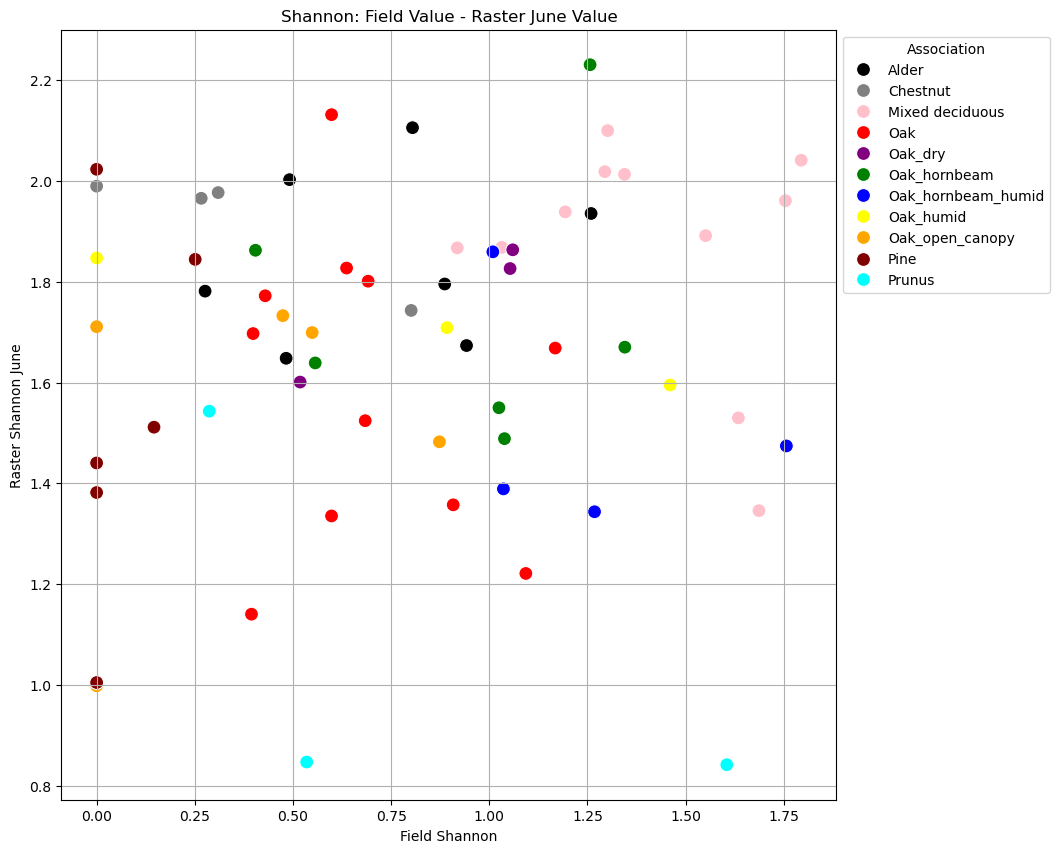

In [27]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon June', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: Field Value - Raster June Value')
plt.show()

In [28]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic)  + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-10.828100475531903
6.0764882942653e-19
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!
The Pearson correlation coefficient is equal to 0.0031375831339687520.003137583133968752; the p value is 0.9818620391121369
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [29]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

-3.18355207277708

In [30]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

0.9308179587625623

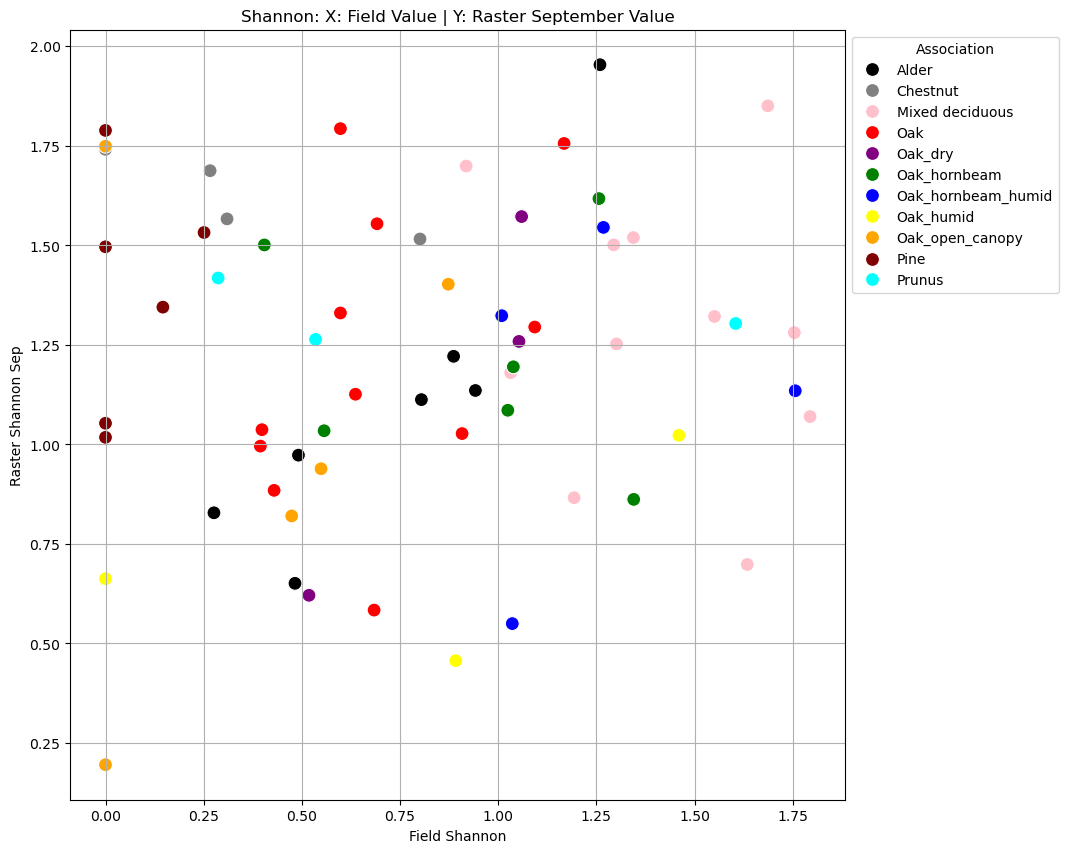

In [31]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon Sep', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: X: Field Value | Y: Raster September Value')
plt.show()

In [32]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic)  + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-4.02315285819743
0.0001067699103524286
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!
The Pearson correlation coefficient is equal to 0.106463789370911120.10646378937091112; the p value is 0.439153248073854
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [33]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

-1.1062090153189916

In [34]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

0.6026524584152985